# Practica 1.1. Manipuación de datos

## Objetivo

En esta práctica, aprenderás a aplicar técnicas de análisis de datos utilizando Pandas para explorar un dataset relacionado con la salud mental. El objetivo es que pongas en práctica tus habilidades de manipulación, limpieza y análisis de datos para obtener conclusiones interesantes.

## 1.-Carga del conjunto de datos

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [55]:
df=pd.read_csv("mental_health.csv")

In [56]:
df.head()

,Age,Gender,Education_Level,Employment_Status,Sleep_Hours,Physical_Activity_Hrs,Social_Support_Score,Anxiety_Score,Depression_Score,Stress_Level,...,Chronic_Illnesses,Medication_Use,Therapy,Meditation,Substance_Use,Financial_Stress,Work_Stress,Self_Esteem_Score,Life_Satisfaction_Score,Loneliness_Score
0,56,Male,Bachelor's,Unemployed,6.0,0.4,3,4,2,9,...,0,NaN,0,1,NaN,4,3,7,5,1
1,69,Female,Bachelor's,Retired,8.8,2.8,6,18,7,6,...,0,NaN,1,0,NaN,1,4,7,4,6
2,46,Female,Master's,Employed,5.3,1.6,5,5,13,8,...,0,NaN,0,1,NaN,8,7,8,1,1
3,32,Female,High School,Unemployed,8.8,0.5,4,6,3,4,...,1,NaN,0,0,NaN,7,4,8,4,4
4,60,Female,Bachelor's,Retired,7.2,0.7,2,7,15,3,...,0,NaN,1,1,Frequent,8,9,5,7,7


In [57]:
df.shape

(1200, 21)

¿Cuántos registros y columnas tiene el conjunto de datos?

In [58]:
num_registros, num_columnas = df.shape
print(f"El conjunto de datos tiene {num_registros} registros y {num_columnas} columnas.")

El conjunto de datos tiene 1200 registros y 21 columnas.


¿Qué tipo de datos predomina?

In [59]:
print(f"Tipos de datos en el conjunto de datos:\n{df.dtypes}")

Tipos de datos en el conjunto de datos:
Age                                int64
Gender                            object
Education_Level                   object
Employment_Status                 object
Sleep_Hours                      float64
Physical_Activity_Hrs            float64
Social_Support_Score               int64
Anxiety_Score                      int64
Depression_Score                   int64
Stress_Level                       int64
Family_History_Mental_Illness      int64
Chronic_Illnesses                  int64
Medication_Use                    object
Therapy                            int64
Meditation                         int64
Substance_Use                     object
Financial_Stress                   int64
Work_Stress                        int64
Self_Esteem_Score                  int64
Life_Satisfaction_Score            int64
Loneliness_Score                   int64
dtype: object


In [60]:
tipo_predominante = df.dtypes.mode()[0]
print(f"El tipo de dato predominante es: {tipo_predominante}")

El tipo de dato predominante es: int64


## 2.-Exploración inicial

In [61]:
print("Información general sobre el conjunto de datos:")
print(df.info())

Información general sobre el conjunto de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            1200 non-null   int64  
 1   Gender                         1200 non-null   object 
 2   Education_Level                1200 non-null   object 
 3   Employment_Status              1200 non-null   object 
 4   Sleep_Hours                    1200 non-null   float64
 5   Physical_Activity_Hrs          1200 non-null   float64
 6   Social_Support_Score           1200 non-null   int64  
 7   Anxiety_Score                  1200 non-null   int64  
 8   Depression_Score               1200 non-null   int64  
 9   Stress_Level                   1200 non-null   int64  
 10  Family_History_Mental_Illness  1200 non-null   int64  
 11  Chronic_Illnesses              1200 non-null   int64  
 12  

In [62]:
print("\nValores nulos en cada columna:")
print(df.isnull().sum())


Valores nulos en cada columna:
Age                                0
Gender                             0
Education_Level                    0
Employment_Status                  0
Sleep_Hours                        0
Physical_Activity_Hrs              0
Social_Support_Score               0
Anxiety_Score                      0
Depression_Score                   0
Stress_Level                       0
Family_History_Mental_Illness      0
Chronic_Illnesses                  0
Medication_Use                   747
Therapy                            0
Meditation                         0
Substance_Use                    834
Financial_Stress                   0
Work_Stress                        0
Self_Esteem_Score                  0
Life_Satisfaction_Score            0
Loneliness_Score                   0
dtype: int64


In [63]:
print("\nEstadísticas descriptivas :")
print(df.describe())


Estadísticas descriptivas :
               Age  Sleep_Hours  Physical_Activity_Hrs  Social_Support_Score  \
count  1200.000000   1200.00000            1200.000000           1200.000000   
mean     46.317500      6.46900               2.005750              5.055000   
std      16.451157      1.52955               2.037818              2.652893   
min      18.000000      2.00000               0.000000              1.000000   
25%      33.000000      5.40000               0.600000              3.000000   
50%      46.000000      6.40000               1.400000              5.000000   
75%      61.000000      7.50000               2.700000              7.000000   
max      74.000000     12.40000              15.100000              9.000000   

       Anxiety_Score  Depression_Score  Stress_Level  \
count    1200.000000       1200.000000   1200.000000   
mean       10.470000         10.674167      5.000833   
std         5.911138          5.632889      2.538281   
min         1.000000      

¿Existen columnas que podrían ser categóricas pero aparecen como tipo object?

Sí, las siguientes columnas podrían ser categóricas pero aparecen como tipo object:

In [64]:
print("\nRevisión de columnas que podrían ser categóricas pero tienen tipo 'object':")
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"Columna: {col}")
        print(df[col].unique())  
        print()


Revisión de columnas que podrían ser categóricas pero tienen tipo 'object':
Columna: Gender
['Male' 'Female' 'Non-Binary' 'Other']

Columna: Education_Level
["Bachelor's" "Master's" 'High School' 'Other' 'PhD']

Columna: Employment_Status
['Unemployed' 'Retired' 'Employed' 'Student']

Columna: Medication_Use
[nan 'Occasional' 'Regular']

Columna: Substance_Use
[nan 'Frequent' 'Occasional']



¿Hay valores que parecen inconsistentes o fuera de rango?

No, no hay valores inscosistentes o fuera de rango, e menos que contemos los datos faltantes

## 3. Limpieza de datos

¿Qué porcentaje del conjunto de datos contiene valores nulos?

Medication_Use con un 62.25% y Substance_Use con un 69.50

In [65]:
porcentaje_nulos = df.isnull().mean() * 100
print("\nPorcentaje de valores nulos en cada columna:")
print(porcentaje_nulos)


Porcentaje de valores nulos en cada columna:
Age                               0.00
Gender                            0.00
Education_Level                   0.00
Employment_Status                 0.00
Sleep_Hours                       0.00
Physical_Activity_Hrs             0.00
Social_Support_Score              0.00
Anxiety_Score                     0.00
Depression_Score                  0.00
Stress_Level                      0.00
Family_History_Mental_Illness     0.00
Chronic_Illnesses                 0.00
Medication_Use                   62.25
Therapy                           0.00
Meditation                        0.00
Substance_Use                    69.50
Financial_Stress                  0.00
Work_Stress                       0.00
Self_Esteem_Score                 0.00
Life_Satisfaction_Score           0.00
Loneliness_Score                  0.00
dtype: float64


In [66]:
for column in df.columns:
    duplicados_columna = df[column].duplicated().sum()
    print(f"Número de duplicados en la columna '{column}': {duplicados_columna}")


Número de duplicados en la columna 'Age': 1143
Número de duplicados en la columna 'Gender': 1196
Número de duplicados en la columna 'Education_Level': 1195
Número de duplicados en la columna 'Employment_Status': 1196
Número de duplicados en la columna 'Sleep_Hours': 1115
Número de duplicados en la columna 'Physical_Activity_Hrs': 1101
Número de duplicados en la columna 'Social_Support_Score': 1191
Número de duplicados en la columna 'Anxiety_Score': 1180
Número de duplicados en la columna 'Depression_Score': 1180
Número de duplicados en la columna 'Stress_Level': 1191
Número de duplicados en la columna 'Family_History_Mental_Illness': 1198
Número de duplicados en la columna 'Chronic_Illnesses': 1198
Número de duplicados en la columna 'Medication_Use': 1197
Número de duplicados en la columna 'Therapy': 1198
Número de duplicados en la columna 'Meditation': 1198
Número de duplicados en la columna 'Substance_Use': 1197
Número de duplicados en la columna 'Financial_Stress': 1191
Número de du

¿Qué estrategia decide aplicar para tratar los valores nulos y por qué?

Como las columnas con valores nulos no son necesarias para el informe, se eliminarán las columnas Medication_Use y Substance_Use. En cuanto a las columnas que contienen valores duplicados, estas no serán eliminadas, ya que los duplicados son aceptables debido a la naturaleza de las variables, lo que permite que se repitan sin afectar la calidad del análisis.

In [67]:
df_cleaned = df.drop(columns=['Medication_Use', 'Substance_Use'])

In [68]:
df_cleaned.head()

,Age,Gender,Education_Level,Employment_Status,Sleep_Hours,Physical_Activity_Hrs,Social_Support_Score,Anxiety_Score,Depression_Score,Stress_Level,Family_History_Mental_Illness,Chronic_Illnesses,Therapy,Meditation,Financial_Stress,Work_Stress,Self_Esteem_Score,Life_Satisfaction_Score,Loneliness_Score
0,56,Male,Bachelor's,Unemployed,6.0,0.4,3,4,2,9,0,0,0,1,4,3,7,5,1
1,69,Female,Bachelor's,Retired,8.8,2.8,6,18,7,6,0,0,1,0,1,4,7,4,6
2,46,Female,Master's,Employed,5.3,1.6,5,5,13,8,0,0,0,1,8,7,8,1,1
3,32,Female,High School,Unemployed,8.8,0.5,4,6,3,4,1,1,0,0,7,4,8,4,4
4,60,Female,Bachelor's,Retired,7.2,0.7,2,7,15,3,0,0,1,1,8,9,5,7,7


## 4.-Análisis Estadístico

In [69]:
estadisticas = df[['Anxiety_Score', 'Depression_Score', 'Stress_Level']].describe().loc[['mean', '50%', 'std']]
estadisticas.rename(index={'50%': 'median'}, inplace=True)
print(estadisticas)

        Anxiety_Score  Depression_Score  Stress_Level
mean        10.470000         10.674167      5.000833
median      10.500000         11.000000      5.000000
std          5.911138          5.632889      2.538281


¿Cuál de los tres puntajes tiene mayor variabilidad?

El puntaje con mayor variabilidad es el Anxiety_Score con una desviación estándar de 5.91, seguido de Depression_Score (5.63) y finalmente Stress_Level (2.54).


¿Qué observas sobre la diferencia entre media y mediana en cada caso? ¿Qué te dice esto sobre la distribución?

Anxiety_Score:
La media (10.47) es ligeramente menor que la mediana (10.50), lo que indica una distribución ligeramente sesgada a la izquierda. Esto sugiere que, aunque la mayoría de los participantes tienen niveles de ansiedad cercanos a la media, hay algunos participantes con niveles de ansiedad notablemente bajos que están tirando de la media hacia abajo.

Depression_Score:
La media (10.67) es ligeramente menor que la mediana (11.00), lo que también podría indicar una ligera asimetría a la izquierda en la distribución. Sin embargo, la diferencia es pequeña y podría no tener un impacto significativo en el análisis.

Stress_Level:
La media (5.00) es igual a la mediana (5.00), lo que indica que los datos están bien distribuidos y simétricos. Esto sugiere que los puntajes de estrés están distribuidos de manera bastante uniforme en el conjunto de datos.

## 5.-Filtrado de datos

In [70]:
ansiedad_alta = df[df['Anxiety_Score'] > 10]

porcentaje_alto_ansiedad = (len(ansiedad_alta) / len(df)) * 100
print(f"Porcentaje del total con niveles altos de ansiedad: {porcentaje_alto_ansiedad:.2f}%")

Porcentaje del total con niveles altos de ansiedad: 50.00%


¿Qué porcentaje del total presenta niveles altos de ansiedad?

Para determinar qué porcentaje de personas presenta niveles altos de ansiedad, se debe establecer un umbral adecuado para considerar "alto" un puntaje de ansiedad. Sin embargo, dado que el valor máximo de los puntajes de ansiedad no está claro en los datos proporcionados, sería necesario revisar la documentación del conjunto de datos o la fuente original para identificar cuál es el valor máximo que se toma en cuenta para evaluar la ansiedad. Si, por ejemplo, el valor máximo es 20, entonces cualquier puntaje superior a un valor como 15 o 18 podría considerarse alto. Sin esta información, no podemos hacer una evaluación precisa del porcentaje de personas con niveles altos de ansiedad.

Se utilizo la mediana para determinar qué porcentaje de personas presenta niveles altos de ansiedad, correspondiente a 10 la mendiana, se determinar que el 50 % de personas padecen niveles altos de ansiedad.

In [71]:
horasdesueño = [
    (df['Sleep_Hours'] < 5),
    (df['Sleep_Hours'] >= 5) & (df['Sleep_Hours'] <= 7),
    (df['Sleep_Hours'] > 7)
]

clasificacion = ['Menos de 5 horas', 'Entre 5 y 7 horas', 'Más de 7 horas']

df['sueño'] = np.select(horasdesueño, clasificacion, default='Desconocido')

estresporsueño = df.groupby('sueño')['Stress_Level'].describe()
print("\nAnálisis del nivel de estrés en cada grupo de horas de sueño:")
print(estresporsueño)



Análisis del nivel de estrés en cada grupo de horas de sueño:
                   count      mean       std  min  25%  50%  75%  max
sueño                                                                
Entre 5 y 7 horas  590.0  4.954237  2.544599  1.0  3.0  5.0  7.0  9.0
Menos de 5 horas   190.0  5.136842  2.543216  1.0  3.0  5.0  7.0  9.0
Más de 7 horas     420.0  5.004762  2.530949  1.0  3.0  5.0  7.0  9.0


¿Existe una relación visible entre las horas de sueño y el nivel de estrés?

No parece haber una relación clara entre las horas de sueño y el nivel de estrés. Aunque se pueden observar pequeñas diferencias en los promedios de estrés, estas diferencias son mínimas y no indican una tendencia significativa. Es posible que otros factores estén influyendo en los niveles de estrés, o que sea necesario realizar un análisis más profundo (por ejemplo, considerando variables adicionales) para encontrar correlaciones más evidentes.

Es recomendable investigar más a fondo con otros factores o mediante un análisis estadístico más detallado (como la correlación) si se busca entender mejor la relación entre el sueño y el estrés.

## 6.-Ordenamiento

In [72]:
df_ordenado = df_cleaned.sort_values(by=['Life_Satisfaction_Score', 'Loneliness_Score'], ascending=[False, True])
df_ordenado

,Age,Gender,Education_Level,Employment_Status,Sleep_Hours,Physical_Activity_Hrs,Social_Support_Score,Anxiety_Score,Depression_Score,Stress_Level,Family_History_Mental_Illness,Chronic_Illnesses,Therapy,Meditation,Financial_Stress,Work_Stress,Self_Esteem_Score,Life_Satisfaction_Score,Loneliness_Score
14,53,Male,Bachelor's,Employed,4.9,1.5,5,17,4,6,0,0,0,1,8,4,6,9,1
33,44,Male,Bachelor's,Employed,7.2,1.7,3,4,4,8,0,0,0,0,6,6,7,9,1
83,61,Female,PhD,Unemployed,5.7,1.8,4,17,20,9,0,0,0,1,7,8,6,9,1
92,31,Female,PhD,Employed,6.8,0.4,8,20,18,5,1,0,0,0,1,5,4,9,1
103,43,Female,Other,Student,5.5,5.1,9,12,6,6,0,0,1,0,6,8,8,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,40,Female,Other,Unemployed,5.0,3.4,4,7,16,1,0,0,0,0,8,2,7,1,9
1132,61,Male,High School,Student,5.6,1.1,3,16,2,5,0,1,0,0,2,3,6,1,9
1133,36,Non-Binary,Master's,Employed,5.4,3.0,2,19,7,5,0,0,0,0,9,5,6,1,9
1144,54,Male,Bachelor's,Student,8.4,0.8,7,18,11,5,0,0,0,0,7,3,9,1,9


In [73]:
df_ordenado.head(10)

,Age,Gender,Education_Level,Employment_Status,Sleep_Hours,Physical_Activity_Hrs,Social_Support_Score,Anxiety_Score,Depression_Score,Stress_Level,Family_History_Mental_Illness,Chronic_Illnesses,Therapy,Meditation,Financial_Stress,Work_Stress,Self_Esteem_Score,Life_Satisfaction_Score,Loneliness_Score
14,53,Male,Bachelor's,Employed,4.9,1.5,5,17,4,6,0,0,0,1,8,4,6,9,1
33,44,Male,Bachelor's,Employed,7.2,1.7,3,4,4,8,0,0,0,0,6,6,7,9,1
83,61,Female,PhD,Unemployed,5.7,1.8,4,17,20,9,0,0,0,1,7,8,6,9,1
92,31,Female,PhD,Employed,6.8,0.4,8,20,18,5,1,0,0,0,1,5,4,9,1
103,43,Female,Other,Student,5.5,5.1,9,12,6,6,0,0,1,0,6,8,8,9,1
217,25,Female,Master's,Employed,6.9,3.4,4,15,5,1,1,0,0,0,3,5,6,9,1
262,49,Female,High School,Retired,3.6,0.7,6,14,15,6,0,0,0,0,3,2,4,9,1
391,44,Other,PhD,Retired,7.4,2.4,4,7,7,4,0,1,1,0,3,4,3,9,1
438,41,Female,Master's,Employed,5.4,0.2,1,18,9,8,0,0,0,1,2,6,4,9,1
675,29,Male,Other,Unemployed,8.0,0.4,3,7,9,8,1,0,0,0,8,5,5,9,1


¿Qué características comunes encuentras en estas 10 personas?

Educación: La mayoría de estas personas tienen un nivel educativo alto, entre Licenciatura, Maestría, o PhD.

Empleo: La mayoría está empleada, aunque algunos son estudiantes o jubilados. El empleo parece tener una relación positiva con la satisfacción de vida.

Sueño: Las horas de sueño varían, pero muchas personas duermen entre 5 y 7 horas.

Apoyo social: La mayoría de estas personas tienen una puntuación de apoyo social bastante alta, lo que podría ser un factor importante en su satisfacción de vida y baja soledad.

Estrés y ansiedad: Aunque hay puntajes altos de ansiedad en algunos casos, los niveles de estrés son generalmente moderados y no parecen ser un factor determinante en su satisfacción de vida.

¿Qué hipótesis podrían plantearse sobre el vínculo entre satisfacción y soledad?

El apoyo social tiene un papel crucial en la satisfacción de vida. Las personas con una puntuación alta de apoyo social tienden a tener una mayor satisfacción en la vida y menor soledad.

El empleo y nivel educativo más alto están correlacionados con mayor satisfacción de vida. Las personas empleadas y con un alto nivel educativo parecen tener mayor bienestar.

El sueño moderado podría estar asociado con una mejor calidad de vida, ya que la mayoría de estas personas duermen entre 5 y 7 horas por noche.

## 7.- Guardado de Resultados

In [74]:
df_filtrado = df[(df['Therapy'] == 1) & (df['Stress_Level'] < 5)]
df_filtrado

,Age,Gender,Education_Level,Employment_Status,Sleep_Hours,Physical_Activity_Hrs,Social_Support_Score,Anxiety_Score,Depression_Score,Stress_Level,...,Medication_Use,Therapy,Meditation,Substance_Use,Financial_Stress,Work_Stress,Self_Esteem_Score,Life_Satisfaction_Score,Loneliness_Score,sueño
4,60,Female,Bachelor's,Retired,7.2,0.7,2,7,15,3,...,NaN,1,1,Frequent,8,9,5,7,7,Más de 7 horas
12,41,Female,PhD,Employed,9.4,1.3,3,11,7,2,...,Occasional,1,0,NaN,4,1,2,8,5,Más de 7 horas
22,61,Female,High School,Employed,8.3,7.6,6,6,15,3,...,NaN,1,0,NaN,3,6,4,4,7,Más de 7 horas
34,59,Female,Master's,Student,6.6,0.8,8,2,1,4,...,Regular,1,0,NaN,2,1,6,3,9,Entre 5 y 7 horas
40,61,Male,PhD,Unemployed,7.1,3.4,8,17,8,3,...,Occasional,1,1,NaN,4,3,2,8,7,Más de 7 horas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1139,43,Male,High School,Student,5.8,3.8,3,7,20,3,...,NaN,1,0,Occasional,2,8,2,8,7,Entre 5 y 7 horas
1161,26,Female,High School,Student,8.0,2.2,5,10,17,4,...,NaN,1,0,NaN,9,3,3,2,4,Más de 7 horas
1163,20,Female,Master's,Employed,6.7,0.2,7,17,8,2,...,NaN,1,0,NaN,9,4,9,4,9,Entre 5 y 7 horas
1174,45,Female,PhD,Unemployed,3.7,1.6,9,3,3,2,...,NaN,1,1,NaN,9,6,3,5,3,Menos de 5 horas


In [75]:
df_filtrado.to_csv('personas_terapia_bajo_estres.csv', index=False)

¿Cuántas personas cumplen con ambas condiciones?


In [76]:
print(f"El número de personas que cumplen ambas condiciones: {len(df_filtrado)}")

El número de personas que cumplen ambas condiciones: 108


¿Qué conclusiones puedes hacer sobre la relación entre terapia y nivel de estrés en este conjunto?

Podemos decir que existe una relación entre recibir terapia y tener un nivel de estrés bajo, ya que 108 personas cumplen con ambas condiciones. Sin embargo, este grupo representa solo el 9% del total (108 de 1200 personas), por lo que el porcentaje es muy bajo para hacer una afirmación concluyente. Sería necesario analizar más a fondo estos datos y realizar pruebas estadísticas para determinar si realmente hay una relación significativa entre la terapia y el nivel de estrés.

## 8.-Visualización

In [77]:
estadisticas_self_esteem = df['Self_Esteem_Score'].describe()
print(estadisticas_self_esteem)

count    1200.000000
mean        5.062500
std         2.531587
min         1.000000
25%         3.000000
50%         5.000000
75%         7.000000
max         9.000000
Name: Self_Esteem_Score, dtype: float64


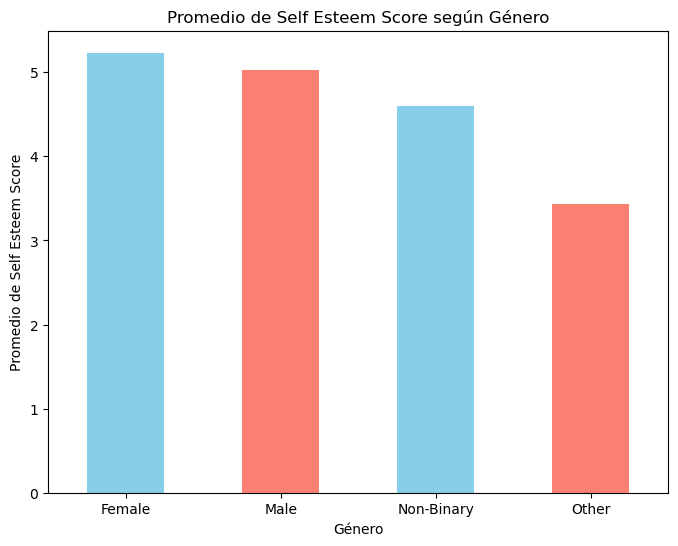

In [78]:
promedio_self_esteem = df.groupby('Gender')['Self_Esteem_Score'].mean()

plt.figure(figsize=(8, 6))
promedio_self_esteem.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Promedio de Self Esteem Score según Género')
plt.xlabel('Género')
plt.ylabel('Promedio de Self Esteem Score')
plt.xticks(rotation=0)
plt.show()

¿Hay diferencias notables entre los géneros en cuanto a autoestima?

Sí, existen diferencias, aunque son relativamente poco notables. Todos los géneros se encuentran por encima de la media en cuanto al puntaje de autoestima. Sin embargo, es evidente que las mujeres tienen un nivel de autoestima más alto, seguidas por los hombres, mientras que las personas de género no binario o de otro género tienden a presentar los niveles más bajos de autoestima. Estas diferencias pueden estar influenciadas por factores sociales y culturales, como las expectativas y presiones relacionadas con el género, la identidad personal y las normas de comportamiento que afectan a cada grupo. A pesar de ello, es importante considerar que estos resultados pueden variar según el contexto y deben ser analizados más profundamente para entender completamente los factores que contribuyen a estas diferencias.

¿Qué factores del conjunto de datos podrían explicar estas diferencias?

Los factores clave que podrían influir en la diferencia de autoestima entre géneros son:

Redes de apoyo social: Un mayor apoyo puede mejorar la autoestima.

Estrés: El estrés elevado puede reducir la autoestima.

Salud mental: Altos niveles de ansiedad y depresión tienden a disminuir la autoestima.